# MEEN 689 HOMEWORK 3
Name: Chinonyelum Okereafor

UIN: 733001665

If the F-statistic is larger than a critical value from the F-distribution (based on significance level, typically 0.05), we reject the null hypothesis.

1. Excel Sheet Q1 contains data for a two-variable, full factorial experiment with 2 replications for each condition. Answer the following questions:

In [288]:
#Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

In [289]:
#Reading the Excel file Q1 sheet into Python
df1 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 3/HW3Data.xlsx',
                    sheet_name = 'Q1')
print("Sheet Q1 Table:")
df1

Sheet Q1 Table:


,Factor A,Factor B,Response
0,A1,B1,9
1,A1,B1,12
2,A1,B2,15
3,A1,B2,13
4,A1,B3,25
5,A1,B3,24
6,A2,B1,30
7,A2,B1,27
8,A2,B2,25
9,A2,B2,27


a. Plot the results (as those shown in slides) using the average of 2 replication for each condition.

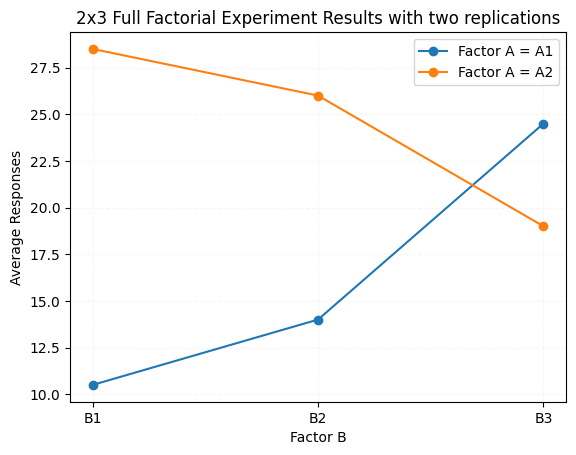

Average Responses Table: 


,Factor A,Factor B,Response
0,A1,B1,10.5
1,A1,B2,14.0
2,A1,B3,24.5
3,A2,B1,28.5
4,A2,B2,26.0
5,A2,B3,19.0


In [290]:
# Calculate the average response for each condition (Factor A and Factor B)
average_responses = df1.groupby(['Factor A', 'Factor B']).mean().reset_index()

# Plot the results
fig, ax = plt.subplots()

# Plot the averages for each condition
for label, group in average_responses.groupby('Factor A'):
    ax.plot(group['Factor B'], group['Response'], marker='o',
            label=f'Factor A = {label}')

# Add labels and title
ax.set_xlabel('Factor B')
ax.set_ylabel('Average Responses')
ax.set_title('2x3 Full Factorial Experiment Results with two replications')

#Add grid
plt.grid(True, linestyle='--', alpha=0.1)

# Add legend
ax.legend()

# Show the plot
plt.show()

#Printing the Average responses displayed on the plot for better visibility
print("Average Responses Table: ")
average_responses

b. Run 2-way ANOVA with interaction and list the result.

In [291]:
# Create the dataframe using the provided data Q1
data_b = {
    'Factor_A': df1['Factor A'],
    'Factor_B': df1['Factor B'],
    'Response': df1['Response']
}

df1_b = pd.DataFrame(data_b)

# Perform the two-way ANOVA with interaction
model_with_interaction = ols('Response ~ Factor_A * Factor_B', data=df1_b).fit()
anova_table_with_interaction = sm.stats.anova_lm(model_with_interaction, typ=2)

# Display the ANOVA table
print("ANOVA Table with Interaction: ")
anova_table_with_interaction

ANOVA Table with Interaction: 


,sum_sq,df,F,PR(>F)
Factor_A,200.083333,1.0,77.451613,0.000119
Factor_B,11.166667,2.0,2.161290,0.196376
Factor_A:Factor_B,298.166667,2.0,57.709677,0.000121
Residual,15.500000,6.0,NaN,NaN


c. Conclude your 2-way ANOVA statistically.

**Explanation:**

From the 2-way ANOVA with interaction results, we can see that the **F-statistic** for **Factor A** is **77.451613** with a very low **p-value** of **0.000119**, the **F-statistic** for **Factor A: Factor B** is **57.709677**
with a **p-value** of **0.000121**. Since the p-values are much smaller than the significance level (typically 0.05), we reject the null hypothesis, indicating that there are statistically significant differences for **Factor A** and **Factor A:Factor B** results.

However, the **F-statistic** for **Factor B** is **2.161290** with a  **p-value** of **0.196376** is greater than the significance level of 0.05. This means that the results for **Factor B** is **NOT** statistically significantly different.

d. Now, try to run 2-way ANOVA without interaction and list the result.

In [292]:
# Create the dataframe using the provided data
data_d = {
    'Factor_A': df1['Factor A'],
    'Factor_B': df1['Factor B'],
    'Response': df1['Response']
}

df1_d = pd.DataFrame(data_d)

# Perform the two-way ANOVA without interaction
model_no_interaction = ols('Response ~ Factor_A + Factor_B', data=df1_d).fit()
anova_table_no_interaction = sm.stats.anova_lm(model_no_interaction, typ=2)

# Display the ANOVA table
print("ANOVA Table without Interaction: ")
anova_table_no_interaction

ANOVA Table without Interaction: 


,sum_sq,df,F,PR(>F)
Factor_A,200.083333,1.0,5.103082,0.053806
Factor_B,11.166667,2.0,0.142402,0.869423
Residual,313.666667,8.0,NaN,NaN


e. Do you still get the same conclusion? Why or Why not?

**Explanation:**

**Yes** and **No**. The conclusion is **SAME** for both the **sum of squares** & **Degree of freedom** results for **Factor A** and **Factor B** only. However, the **sum of squares** & **Degree of freedom** results for **Residual**, as well as the p-values for **Factor A** and **Factor B** are **DIFFERENT** in the 2 anova tables above (*with and without interaction*).

.

**To expantiate:**

**Yes.** **(Why?):**
The **sum of squares** and **degrees of freedom** for **Factor A** is **200.083333** and **1** respectively, for **Factor B** is **11.166667** and **2** respectively remain the **SAME** in both anova table results (*with or without interaction*).

.

**No.** **(Why Not?):**
The **p-values** for both **Factor A** and **Factor B** are significantly **DIFFERENT** between the two tables.

**ANOVA table without interaction:**

**Factor A** has a p-value of **0.053806**, which is borderline and not conventionally significant (above 0.05). **Factor B** has a p-value of **0.869423**, clearly indicating **NO** significant effect.

**ANOVA table with interaction:**

**Factor A** shows a p-value of **0.000119**, which **is highly significant**. **Factor B** still shows no significant effect (**p-value = 0.196376**), aligning with the non-interactive analysis. The interaction term itself (**Factor AB**) has a p-value of **0.000121**, indicating **a highly significant interaction effect**, altering the impact of **Factor A** depending on the levels of **Factor B**.

**Residuals:**

The **sum of squares** for residuals and their **degrees of freedom** are also different between the tables, reflecting the additional variance explained by the interaction term in the model with interaction.

**Conclusion:**

Although **sum of squares** and **degrees of freedom** remain constant for both factors in both models, introducing an interaction term significantly changes the p-values, particularly for **Factor A**. This suggests **Factor A's** impact depends on **Factor B's** levels, revealing distinct conclusions about their significance and interaction.

2. You are to design a two-variable experiment (Fertilizer and Water amount) and see how they affect the flow growth (cm). Because of potential soil-to-soil variation, the experiment is intentionally conducted in three areas (blocks) of soils. The data is listed in Excel Sheet Q2, note that Water Amount is measured in numbers.

In [293]:
#Reading the Excel file Q2 sheet into Python
df2 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 3/HW3Data.xlsx',
                    sheet_name = 'Q2')
print("Sheet Q2 Table:")
df2

Sheet Q2 Table:


,Soil,Fertilizer,Water Amount (in),Growth (cm)
0,S1,F1,0.9,14
1,S1,F1,1.6,15
2,S1,F2,1.0,16
3,S1,F2,1.5,17
4,S2,F1,1.1,12
5,S2,F1,1.5,13
6,S2,F2,1.0,15
7,S2,F2,1.4,14
8,S3,F1,0.9,10
9,S3,F1,1.6,11


a. Conduct two-way ANOVA with blocking and list your result.

In [294]:
# Create the dataframe using the provided data
data_block = {
    'Soil': df2['Soil'],
    'Fertilizer': df2['Fertilizer'],
    'Water_Amount': df2['Water Amount (in)'],
    'Growth': df2['Growth (cm)']
}

df_block = pd.DataFrame(data_block)

#previous table
df_block

,Soil,Fertilizer,Water_Amount,Growth
0,S1,F1,0.9,14
1,S1,F1,1.6,15
2,S1,F2,1.0,16
3,S1,F2,1.5,17
4,S2,F1,1.1,12
5,S2,F1,1.5,13
6,S2,F2,1.0,15
7,S2,F2,1.4,14
8,S3,F1,0.9,10
9,S3,F1,1.6,11


In [295]:
#Writing Function to categorize column Water Amount into 1 and 2
def func(x):
  if x <= 1.1:
    return '1'
  else:
    return '2'
df_block_new = df_block
df_block_new['Water_Amount'] = df_block.Water_Amount.apply(func)

#Display New Table after categorizing column Water Amount
df_block_new

,Soil,Fertilizer,Water_Amount,Growth
0,S1,F1,1,14
1,S1,F1,2,15
2,S1,F2,1,16
3,S1,F2,2,17
4,S2,F1,1,12
5,S2,F1,2,13
6,S2,F2,1,15
7,S2,F2,2,14
8,S3,F1,1,10
9,S3,F1,2,11


In [302]:
#Checking for datatypes
df_block_new.info()

#This shows that Soil, Fertilizer, Water Amount are categorical variables while Growth are values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Soil          12 non-null     object
 1   Fertilizer    12 non-null     object
 2   Water_Amount  12 non-null     object
 3   Growth        12 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 512.0+ bytes


In [303]:
# Perform two-way ANOVA with blocking (using Soil as the blocking factor)
model_blocking = ols('Growth ~ Fertilizer + Water_Amount + Soil',
                     data=df_block_new).fit()
anova_table_blocking = sm.stats.anova_lm(model_blocking, typ=2)

# Display the ANOVA table
print("2-way ANOVA with blocking Table: ")
anova_table_blocking

2-way ANOVA with blocking Table: 


,sum_sq,df,F,PR(>F)
Fertilizer,12.000000,1.0,50.4,0.000194
Water_Amount,1.333333,1.0,5.6,0.049867
Soil,32.000000,2.0,67.2,0.000027
Residual,1.666667,7.0,NaN,NaN


b. Conclude the effect of Fertilizer and Water Amount statistically.

**Comments:**

The two-way ANOVA results show that both **fertilizer** and **water amount** *significantly affect* **plant growth**.

**Fertilizer** has a highly significant impact (**p = 0.000194**), suggesting **strong** effectiveness.

**Water amount** also shows a significant effect (**p = 0.049867**), indicating its influence on **growth**, although **less pronounced** than **fertilizer**.

c. Is there any interaction between the two variables?

**Comments:**

The 2-way ANOVA table does not list an interaction term between **Fertilizer** and **Water Amount**, indicating that the analysis did not evaluate the interaction between these variables. Therefore, **no** conclusions about their interaction can be drawn from the table.

d. Is there any effect of the blocking variable (Soil)?

**Comments:**

The 2-way ANOVA table indicates that the blocking variable, **Soil** significantly affects the outcome with a p-value of **0.000027**.

This suggests a **strong** influence of soil type on the dependent variable, emphasizing the importance of accounting for soil differences in studies of plant growth.

e. Would running regular 2-way ANOVA return (no blocking) the same conclusions?

In [298]:
# Create the dataframe using the provided data
data_no_block = {
    'Water_Amount': df2['Water Amount (in)'],
    'Fertilizer': df2['Fertilizer'],
    'Growth': df2['Growth (cm)']
}

df_no_block = pd.DataFrame(data_no_block)

# Perform two-way ANOVA without considering Soil (no blocking)
model_no_block = ols('Growth ~ Water_Amount + Fertilizer', data=df_no_block).fit()
anova_table_no_block = sm.stats.anova_lm(model_no_block, typ=2)

# Display the ANOVA table
print("2-way ANOVA without blocking Table: ")
anova_table_no_block

2-way ANOVA without blocking Table: 


,sum_sq,df,F,PR(>F)
Fertilizer,12.489334,1.0,3.364204,0.099831
Water_Amount,1.588235,1.0,0.427817,0.529419
Residual,33.411765,9.0,NaN,NaN


**Comments:**

Running a regular 2-way ANOVA **without blocking** does **NOT** yield the same conclusions. Without blocking for soil, the significance of **fertilizer's **effect is reduced **(p = 0.099831)**, *no longer statistically significant*, and **water amount** remains **non-significant** with its p-value of **0.529419**.

This highlights the critical role **soil variability** plays in influencing the overall outcomes of the experiment.

3. Excel Sheet Q3 contains data for a 3-variable, full factorial experiment. Answer the following questions:

In [299]:
#Reading the Excel file Q1 sheet into Python
df3 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 3/HW3Data.xlsx',
                    sheet_name = 'Q3')
print("Sheet Q3 Table:")
df3

Sheet Q3 Table:


,Factor A,Factor B,Factor C,Response
0,A1,B1,C1,10
1,A1,B1,C1,12
2,A1,B1,C2,15
3,A1,B1,C2,16
4,A1,B1,C3,20
5,A1,B1,C3,19
6,A1,B2,C1,13
7,A1,B2,C1,14
8,A1,B2,C2,18
9,A1,B2,C2,19


a. Name this full factorial experiment (e.g., 1 x 2 x 2 or something else)

**Comments:**

The experiment you provided is a three-factor full factorial experiment with:

**Factor A** with **2 levels** (A1 and A2),
**Factor B** with **2 levels** (B1 and B2),
**Factor C** with **3 levels** (C1, C2, and C3),
Response values for each combination of Factor A, B, and C.
Naming:
This is a **2×2×3** full factorial experiment.

b. Run 3-way ANOVA including all possible interactions.

In [300]:
# Create the dataframe using the provided data
data_3way = {
    'Factor_A': df3['Factor A'],
    'Factor_B': df3['Factor B'],
    'Factor_C': df3['Factor C'],
    'Response': df3['Response']
}

df_3way = pd.DataFrame(data_3way)

# Perform three-way ANOVA including all possible interactions
model_3way = ols('Response ~ Factor_A * Factor_B * Factor_C', data=df_3way).fit()
anova_table_3way = sm.stats.anova_lm(model_3way, typ=2)

# Display the ANOVA table
print("3-way ANOVA including all possible interactions Table: ")
anova_table_3way

3-way ANOVA including all possible interactions Table: 


,sum_sq,df,F,PR(>F)
Factor_A,165.375000,1.0,189.000000,1.048671e-08
Factor_B,45.375000,1.0,51.857143,1.084932e-05
Factor_C,5.583333,2.0,3.190476,7.742468e-02
Factor_A:Factor_B,0.375000,1.0,0.428571,5.250404e-01
Factor_A:Factor_C,356.250000,2.0,203.571429,5.507000e-10
Factor_B:Factor_C,0.250000,2.0,0.142857,8.683304e-01
Factor_A:Factor_B:Factor_C,0.250000,2.0,0.142857,8.683304e-01
Residual,10.500000,12.0,NaN,NaN


c. Conclude your results statistically.

**Explanation:**

The 3-way ANOVA results indicate **significant effects** of **Factor A**, **Factor B** and the **interaction** between **Factor A and Factor C** on the dependent variable, with **very low p-values** suggesting **strong evidence against the null hypothesis** in these cases.

**Factor A** and **Factor B** show **significant** main effects as well. However, other interaction terms, including **Factor A B**, **Factor B C**, and the three-way interaction (**Factor A B C**), are **NOT** statistically significant.

This suggests that while two of the individual factors (**Factor A** and **Factor B**) and a two-factor interaction (**Factor A C**) affect the outcome significantly, the combined three-factor interaction (**Factor A B C**) does **not**.


d. From Part b, you may notice a few insignificant terms (p-value > 0.05). Should you remove them and run ANOVA again to obtain the result? Explain. (you may need to do some literature search for this question).

**Explanation:**
When interpreting the results of a three-way ANOVA that includes all possible interactions, it's common to consider simplifying the model by removing terms that are not statistically significant (i.e., those with a p-value greater than 0.05). Here are the considerations and steps typically taken:

**Considerations:**
1. Statistical Significance.
2. Model Hierarchy.
3. Overfitting.
4. Power and Sample Size.

**Suggested Steps:**
1. Re-evaluate Model with Reduced Complexity.
2. Check Model Fit.
3. Validation.
4. Consult Domain Knowledge.

**Removing Insignificant terms using Conditional statements**

In [301]:
# Create the DataFrame from your data
data3 = {
    'Factor_A': df3['Factor A'],
    'Factor_B': df3['Factor B'],
    'Factor_C': df3['Factor C'],
    'Response': df3['Response']
}

df = pd.DataFrame(data3)

# Define the full model with all possible interactions
model_full = ols('Response ~ Factor_A * Factor_B * Factor_C', data=df).fit()
anova_table_full = sm.stats.anova_lm(model_full, typ=2)

# Define the formula for the reduced model based on p-values
significant_terms = [term for term, content in anova_table_full.iterrows() if content['PR(>F)'] <= 0.05]
formula_reduced = 'Response ~ ' + ' + '.join(significant_terms)

# Fit the reduced model
model_reduced = ols(formula_reduced, data=df).fit()
anova_table_reduced = sm.stats.anova_lm(model_reduced, typ=2)

# Print the reduced ANOVA table
print("3-way ANOVA without the insignificant interaction terms Table: ")
anova_table_reduced

3-way ANOVA without the insignificant interaction terms Table: 


,sum_sq,df,F,PR(>F)
Factor_A,165.375000,1.0,247.153846,1.466390e-11
Factor_B,45.375000,1.0,67.813187,2.455915e-07
Factor_A:Factor_C,361.833333,4.0,135.190476,1.201479e-12
Residual,11.375000,17.0,NaN,NaN


**Comments:**

After removing the insignificant interaction terms from the 3-way ANOVA, the revised analysis shows a **more focused** view of significant factors.

Both **Factor A** and **Factor B** continue to **show significant** main effects, and the **interaction between Factor A and Factor C** remains **highly significant**.

This streamlined model highlights the **most impactful** relationships, **improving clarity** and **reducing complexity** in understanding the data's structure. This model adjustment **leads to potentially better model fit** and **interpretability**.
